# Partie 1

In [2]:
#importer les librairies ---SALIFOU Mohamed---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importer le dataset  ---SALIFOU Mohamed---
dataset = pd.read_csv(".././dataset/occupancy.csv")

In [4]:
#vérifier que le dataset a été bien importé  ---SALIFOU Mohamed---
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [5]:
#Vérifier les infos du dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [47]:
#Extraire les données qu'on aura a utilisé  ---SALIFOU Mohamed---
X_extract = dataset[["Temperature","Humidity","Light","HumidityRatio"]]

In [48]:
#Les informations sur le X_extract   ---SALIFOU Mohamed---
X_extract

,Temperature,Humidity,Light,HumidityRatio
140,23.700000,26.272000,585.200000,0.004764
141,23.718000,26.290000,578.400000,0.004773
142,23.730000,26.230000,572.666667,0.004765
143,23.722500,26.125000,493.750000,0.004744
144,23.754000,26.200000,488.600000,0.004767
...,...,...,...,...
2800,24.290000,25.700000,808.000000,0.004829
2801,24.330000,25.736000,809.800000,0.004848
2802,24.330000,25.700000,817.000000,0.004841
2803,24.356667,25.700000,813.000000,0.004849


In [49]:
X_extract.shape

(2665, 4)

In [72]:
#Les informations sur le label  ---SALIFOU Mohamed---
y = dataset[["CO2"]]

In [73]:
y

,CO2
140,749.200000
141,760.400000
142,769.666667
143,774.750000
144,779.000000
...,...
2800,1150.250000
2801,1129.200000
2802,1125.800000
2803,1123.000000


In [52]:
# ---SALIFOU Mohamed---
"""
    Les différentes features de notre dataset ne sont pas uniformes
    Pour ca on passe à la standardisation de notre dataset pour ne pas fausser les prédictions
""" 
# import de la bibliotheque StandardScaler de sklearn.preprocessing pour la standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_extract)


In [53]:
X_scaled

array([[2.20476235, 0.37681367, 1.56686218, 1.20754022],
       [2.22227495, 0.38420166, 1.53968001, 1.22146086],
       [2.23395002, 0.35957501, 1.51676171, 1.20916118],
       ...,
       [2.81770341, 0.14203962, 2.4934545 , 1.33301272],
       [2.84364801, 0.14203962, 2.47746498, 1.34579091],
       [2.89391566, 0.13451481, 2.41750431, 1.36487235]])

In [69]:
#Maintenant on passe à la définition de notre features  --- SALIFOU Mohamed ---
X = np.hstack((X_scaled, np.ones((X_scaled.shape[0], 1))))

In [70]:
X

array([[2.20476235, 0.37681367, 1.56686218, 1.20754022, 1.        ],
       [2.22227495, 0.38420166, 1.53968001, 1.22146086, 1.        ],
       [2.23395002, 0.35957501, 1.51676171, 1.20916118, 1.        ],
       ...,
       [2.81770341, 0.14203962, 2.4934545 , 1.33301272, 1.        ],
       [2.84364801, 0.14203962, 2.47746498, 1.34579091, 1.        ],
       [2.89391566, 0.13451481, 2.41750431, 1.36487235, 1.        ]])

In [86]:
#La dimension de X ---SALIFOU Mohamed---
X.shape

(2665, 5)

In [87]:
#Definition du model  ---SALIFOU Mohamed---
def model(X,theta):
    return X.dot(theta)

In [89]:
#Cost function    ---SALIFOU Mohamed---
def cost_function(X,y, theta):
    m = len(y)
    cost = (1/2*m)* np.sum((y - model(X,theta))**2)
    return cost

In [90]:
# grad ---SALIFOU Mohamed---
def grad(X,y,theta): 
    m = len(y)
    grad = (1/m)* X.T.dot(model(X,theta)-y)
    return grad

In [91]:
#descente de gradient ---SALIFOU Mohamed---
def descent_gradient(X,y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0,n_iterations):
        theta = theta - learning_rate*grad(X,y,theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X,y,theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [105]:
learning_rate = 0.15
n_iterations = 1000
np.random.seed()
theta = np.random.randn(X.shape[1], 1)
theta_final, cost_history = descent_gradient(X,y,theta,learning_rate,n_iterations)

In [106]:
#affichage du theta final  ---SALIFOU Mohamed---
theta_final

array([[ 18.05180003],
       [ 81.49997975],
       [ 67.30420508],
       [141.51011428],
       [717.90647012]])

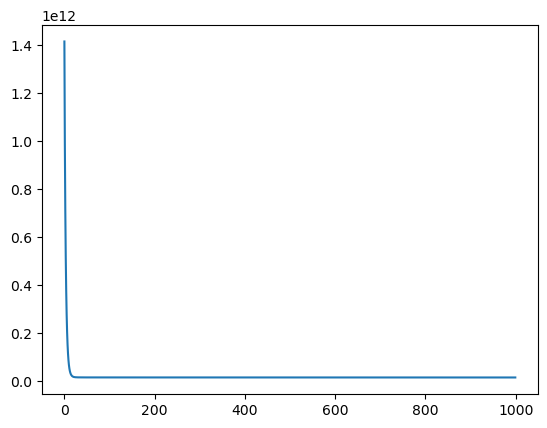

In [107]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [98]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

In [108]:
predictions

array([[1064.75248444],
       [1065.81124779],
       [1060.73181727],
       ...,
       [1136.80277282],
       [1138.00326825],
       [1136.9621115 ]])

In [109]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [110]:
coef_determination(y, predictions)

CO2    0.951182
dtype: float64

In [111]:
X_test = np.array([23.700000, 26.272000,585.200000,0.004764,1])
pred = model(X_test, theta_final)

In [112]:
pred

array([42673.99656559])

# Partie 2


In [196]:
#Ici on extrait les données qu'on souhaite utiliser  ---SALIFOU Mohamed---
x1 = dataset["CO2"]
x2 = dataset["Light"]

features = dataset[["CO2", "Light"]].values
target = dataset[["Occupancy"]].values

In [211]:
features

array([[ 749.2       ,  585.2       ],
       [ 760.4       ,  578.4       ],
       [ 769.66666667,  572.66666667],
       ...,
       [1125.8       ,  817.        ],
       [1123.        ,  813.        ],
       [1124.        ,  798.        ]])

In [197]:
# On passe à la standardisation pour uniformiser les données
X_scaled_1 = scaler.fit_transform(features)

In [198]:
X_scaled_1

array([[0.10694007, 1.56686218],
       [0.14521407, 1.53968001],
       [0.17688126, 1.51676171],
       ...,
       [1.39390353, 2.4934545 ],
       [1.38433502, 2.47746498],
       [1.38775235, 2.41750431]])

In [199]:
X_main = np.hstack((X_scaled_1, np.ones((X_scaled_1.shape[0], 1))))

In [200]:
X_main

array([[0.10694007, 1.56686218, 1.        ],
       [0.14521407, 1.53968001, 1.        ],
       [0.17688126, 1.51676171, 1.        ],
       ...,
       [1.39390353, 2.4934545 , 1.        ],
       [1.38433502, 2.47746498, 1.        ],
       [1.38775235, 2.41750431, 1.        ]])

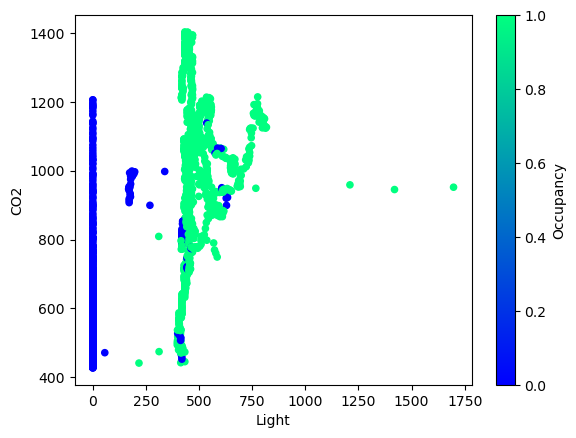

In [201]:
dataset.plot.scatter(x='Light',y='CO2', c='Occupancy', colormap='winter')
plt.show()


In [202]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [203]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [204]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [205]:
#Fonction cout
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [206]:
#descente de gradient
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [207]:
#Optimisation
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [208]:
#prediction
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [209]:
#modele final
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

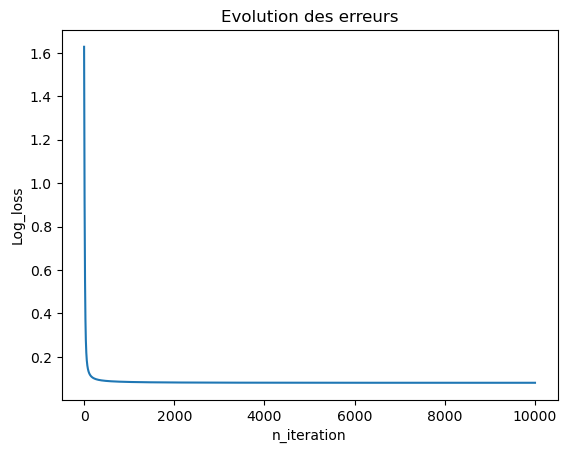

In [218]:
W,b=regression_logistique(X_scaled_1, target)

In [220]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_scaled_1, W, b)
print("Accuracy=",accuracy_score(target, y_pred))

[[0.99150066]
 [0.99064565]
 [0.9898548 ]
 ...
 [0.99994637]
 [0.99994196]
 [0.99992406]]
Accuracy= 0.9782363977485928


In [223]:
#Voir la matrice de confusion
#SALIFOU Mohamed
from sklearn.metrics import confusion_matrix
y_pred = predict(X_scaled_1, W, b)
cm = confusion_matrix(target, y_pred)
print(cm)

[[0.99150066]
 [0.99064565]
 [0.9898548 ]
 ...
 [0.99994637]
 [0.99994196]
 [0.99992406]]
[[1638   55]
 [   3  969]]


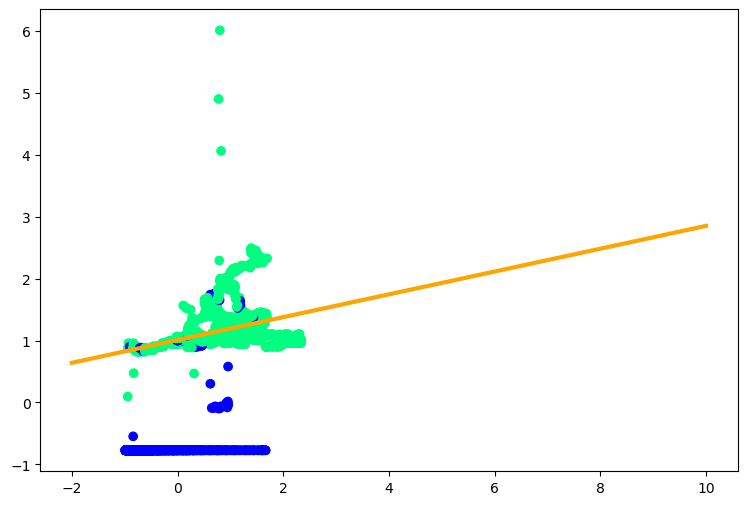

In [242]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_scaled_1[:,0], X_scaled_1[:, 1], c=target, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(-2, 10, 1000)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments


plt.show()

Réaliser un modèle mathématique de régression logistique pour la classification
binaire de la 'Occupancy’ en fonction de 'Temperature', ' Humidity ', 'Light', ‘CO2’ et
‘HumidityRatio’

In [187]:
# SALIFOU Mohamed  
# Extrait des features de notre dataset
features_1 = dataset[["Temperature", "Humidity", "Light", "HumidityRatio", "CO2"]]


In [188]:
features_1

,Temperature,Humidity,Light,HumidityRatio,CO2
140,23.700000,26.272000,585.200000,0.004764,749.200000
141,23.718000,26.290000,578.400000,0.004773,760.400000
142,23.730000,26.230000,572.666667,0.004765,769.666667
143,23.722500,26.125000,493.750000,0.004744,774.750000
144,23.754000,26.200000,488.600000,0.004767,779.000000
...,...,...,...,...,...
2800,24.290000,25.700000,808.000000,0.004829,1150.250000
2801,24.330000,25.736000,809.800000,0.004848,1129.200000
2802,24.330000,25.700000,817.000000,0.004841,1125.800000
2803,24.356667,25.700000,813.000000,0.004849,1123.000000


In [189]:
#SALIFOU Mohamed
#Standariser la dataset
X_scaled_2 = scaler.fit_transform(features_1)

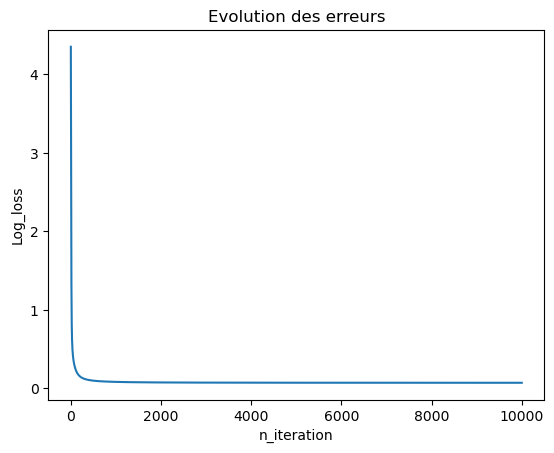

In [226]:
W,b=regression_logistique(X_scaled_2, target)

In [228]:
#SALIFOU Mohamed
from sklearn.metrics import accuracy_score
y_pred_1 = predict(X_scaled_2, W, b)
print("Accuracy=",accuracy_score(target, y_pred_1))

[[0.98723886]
 [0.985235  ]
 [0.98229096]
 ...
 [0.99944439]
 [0.99938862]
 [0.99913036]]
Accuracy= 0.9786116322701689


In [229]:
#Voir la matrice de confusion
#SALIFOU Mohamed
from sklearn.metrics import confusion_matrix
y_pred = predict(X_scaled_2, W, b)
cm = confusion_matrix(target, y_pred)
print(cm)

[[0.98723886]
 [0.985235  ]
 [0.98229096]
 ...
 [0.99944439]
 [0.99938862]
 [0.99913036]]
[[1639   54]
 [   3  969]]
